In [1]:
import csv
from pathlib import Path
from skimage import io
import os
from shared import (get_file_names, plot_comparison, read_image)
from artifact_removal.remove_hair import removeHair
from shared.features import  LesionFeatures

def preprocess_and_extract_features_in_memory(image, doPlot = True):
    f1 = removeHair(image, 100)
    features = LesionFeatures(0, 1)

    if doPlot:
        plot_comparison.plotComparison(image, f1, f'Image {idx}')
    return f1, features

def preprocess_and_extract_features_to_disk(image, dist = 'dist', doPlot = True):
    results = preprocess_and_extract_features_in_memory(image, doPlot)
    feat = results[1]
    Path(dist).mkdir(parents=True, exist_ok=True)
    Path(f'{dist}/images').mkdir(parents=True, exist_ok=True)
    io.imsave(f'{dist}/images/{fNameOnly}', results[0])

    if os.path.exists(f'{dist}/features.csv') == False:
        f = open(f'{dist}/features.csv', 'w+')
        writer = csv.writer(f)
        writer.writerow(feat.featureNamesList)
        f.close()
    else:
        f = open(f'{dist}/features.csv', 'a')
        writer = csv.writer(f)
        writer.writerow(feat.featuresList())
        f.close()


/usr/local/lib/python3.8/dist-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [ ]:
## DEMO Hair Removal
imageNames = get_file_names.getImagesInDir('images/samples/segmented', 'Original', 4)
idx = 0
for f in imageNames:
    fNameOnly = f.split('/')[-1]
    image = read_image.readImage(f)
    preprocess_and_extract_features_to_disk(image, 'dist/01', True)

/usr/local/lib/python3.8/dist-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


Asymmetrical Area:  850
Total Area:  17579
Asymmetry Score:  0.048353148643267535


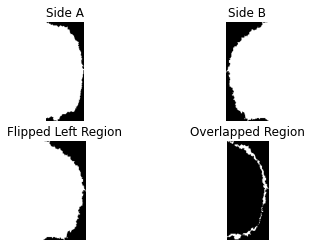

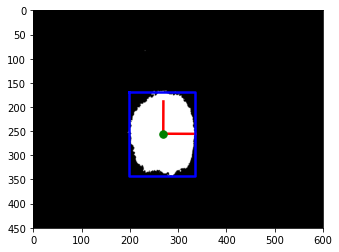

Asymmetrical Area:  5358
Total Area:  75350
Asymmetry Score:  0.07110816191108162


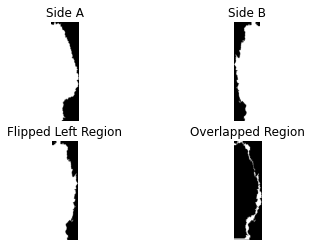

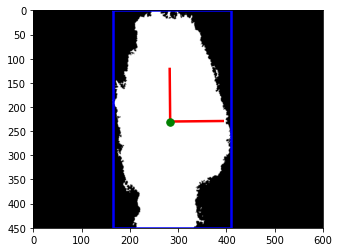

Asymmetrical Area:  37950
Total Area:  104752
Asymmetry Score:  0.3622842523293111


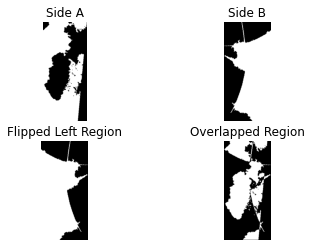

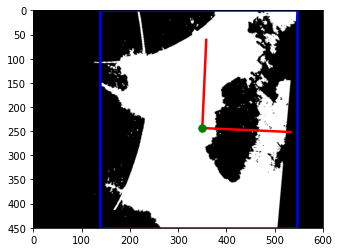

In [2]:
from shared import (get_file_names, plot_comparison, read_image)
from feature_extraction import asymmetry
from feature_extraction.image_stats import LesionMaskStats

## DEMO Feature extraction
idx = 0
maskFilenames = get_file_names.getImagesInDir('images/samples/segmented', 'mask', 3)
for f in maskFilenames:
    fNameOnly = f.split('/')[-1]
    image = read_image.readImage(f)
    stats = LesionMaskStats(image)
    print('Asymmetry Score: ', asymmetry.getAsymmetryScore(stats))
    asymmetry.plotAsymmetry(stats)



